In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [3]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [4]:
filtered_putpieinoven = final_df[final_df['Step'].str.strip() == 'Put pie in oven']
filtered_putpieinoven

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C002,28,Put pie in oven,396.839522,588.972212,633.813499,577.085352,694.780765,1206.768843,904.789629,804.099361
20,C004,30,Put pie in oven,541.747725,468.596219,1015.861546,571.060358,1043.588098,448.732209,306.457588,315.926396
31,C005,46,Put pie in oven,844.406083,1361.269495,1478.000290,1547.566629,2441.203333,1700.842512,1480.698647,981.417434
55,C014,32,Put pie in oven,352.406773,463.945048,1271.244249,447.498455,811.427516,959.576745,761.348568,590.221240
66,C015,33,Put pie in oven,556.256274,503.822225,613.869942,545.769429,681.398567,979.934415,889.555301,686.715558
77,C018,50,Put pie in oven,365.654213,518.550213,333.895844,468.289618,498.591734,896.275358,783.709057,628.644836
88,C019,40,Put pie in oven,185.570837,274.748966,132.523764,172.869095,171.422058,747.038614,592.252997,394.682842
99,C022,32,Put pie in oven,1342.898976,1598.243801,1771.352855,1531.615579,2156.372327,3308.074831,2179.900532,1826.747869
110,C023,52,Put pie in oven,1167.679512,1513.222793,1349.487421,1302.803182,1498.734292,2936.055188,2206.051478,1682.072292
121,C026,33,Put pie in oven,460.076559,696.923894,425.891651,504.448292,288.931966,1409.371767,1159.020858,878.905208


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_putpieinoven = filtered_putpieinoven.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_putpieinoven.select_dtypes(include=['float64', 'int64']).columns
filtered_putpieinoven[numerical_cols] = filtered_putpieinoven[numerical_cols].replace(0, np.nan)

filtered_putpieinoven[numerical_cols] = imputer.fit_transform(filtered_putpieinoven[numerical_cols])
filtered_putpieinoven

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C002,28.0,Put pie in oven,396.839522,588.972212,633.813499,577.085352,694.780765,1206.768843,904.789629,804.099361
20,C004,30.0,Put pie in oven,541.747725,468.596219,1015.861546,571.060358,1043.588098,448.732209,306.457588,315.926396
31,C005,46.0,Put pie in oven,844.406083,1361.269495,1478.000290,1547.566629,2441.203333,1700.842512,1480.698647,981.417434
55,C014,32.0,Put pie in oven,352.406773,463.945048,1271.244249,447.498455,811.427516,959.576745,761.348568,590.221240
66,C015,33.0,Put pie in oven,556.256274,503.822225,613.869942,545.769429,681.398567,979.934415,889.555301,686.715558
77,C018,50.0,Put pie in oven,365.654213,518.550213,333.895844,468.289618,498.591734,896.275358,783.709057,628.644836
88,C019,40.0,Put pie in oven,185.570837,274.748966,132.523764,172.869095,171.422058,747.038614,592.252997,394.682842
99,C022,32.0,Put pie in oven,1342.898976,1598.243801,1771.352855,1531.615579,2156.372327,3308.074831,2179.900532,1826.747869
110,C023,52.0,Put pie in oven,1167.679512,1513.222793,1349.487421,1302.803182,1498.734292,2936.055188,2206.051478,1682.072292
121,C026,33.0,Put pie in oven,460.076559,696.923894,425.891651,504.448292,288.931966,1409.371767,1159.020858,878.905208


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Pie',
    'HeadCamera Distance': 'HeadCamera Distance - Add Pie',
    'LeftElbow Distance': 'LeftElbow Distance - Add Pie',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Pie',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Pie',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Pie',
    'RightElbow Distance': 'RightElbow Distance - Add Pie',
    'RightShoulder Distance': 'RightShoulder Distance - Add Pie'
}

# Rename columns
filtered_putpieinoven = filtered_putpieinoven.rename(columns=new_column_names)
filtered_putpieinoven

,Participant,Block Design Raw Score,Step,Chest Distance - Add Pie,HeadCamera Distance - Add Pie,LeftElbow Distance - Add Pie,LeftShoulder Distance - Add Pie,MotionControllerLeft Distance - Add Pie,MotionControllerRight Distance - Add Pie,RightElbow Distance - Add Pie,RightShoulder Distance - Add Pie
9,C002,28.0,Put pie in oven,396.839522,588.972212,633.813499,577.085352,694.780765,1206.768843,904.789629,804.099361
20,C004,30.0,Put pie in oven,541.747725,468.596219,1015.861546,571.060358,1043.588098,448.732209,306.457588,315.926396
31,C005,46.0,Put pie in oven,844.406083,1361.269495,1478.000290,1547.566629,2441.203333,1700.842512,1480.698647,981.417434
55,C014,32.0,Put pie in oven,352.406773,463.945048,1271.244249,447.498455,811.427516,959.576745,761.348568,590.221240
66,C015,33.0,Put pie in oven,556.256274,503.822225,613.869942,545.769429,681.398567,979.934415,889.555301,686.715558
77,C018,50.0,Put pie in oven,365.654213,518.550213,333.895844,468.289618,498.591734,896.275358,783.709057,628.644836
88,C019,40.0,Put pie in oven,185.570837,274.748966,132.523764,172.869095,171.422058,747.038614,592.252997,394.682842
99,C022,32.0,Put pie in oven,1342.898976,1598.243801,1771.352855,1531.615579,2156.372327,3308.074831,2179.900532,1826.747869
110,C023,52.0,Put pie in oven,1167.679512,1513.222793,1349.487421,1302.803182,1498.734292,2936.055188,2206.051478,1682.072292
121,C026,33.0,Put pie in oven,460.076559,696.923894,425.891651,504.448292,288.931966,1409.371767,1159.020858,878.905208


In [7]:
tracker_columns = ['Chest Distance - Add Pie', 'HeadCamera Distance - Add Pie', 'LeftElbow Distance - Add Pie', 'LeftShoulder Distance - Add Pie',
                   'RightElbow Distance - Add Pie', 'RightShoulder Distance - Add Pie', 'MotionControllerLeft Distance - Add Pie',
                   'MotionControllerRight Distance - Add Pie']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_putpieinoven, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_putpieinoven[block_design_col], filtered_putpieinoven[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_putpieinoven, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Pie,-0.002762,0.992854
1,HeadCamera Distance - Add Pie,0.203858,0.504116
2,LeftElbow Distance - Add Pie,-0.258954,0.392934
3,LeftShoulder Distance - Add Pie,-0.060606,0.844078
4,RightElbow Distance - Add Pie,0.209367,0.492403
5,RightShoulder Distance - Add Pie,0.143251,0.640588
6,MotionControllerLeft Distance - Add Pie,-0.168045,0.583162
7,MotionControllerRight Distance - Add Pie,0.176309,0.564491


In [8]:
#filtered_putpieinoven.to_csv('SimplePie_Putpieinoven.csv',index=False)

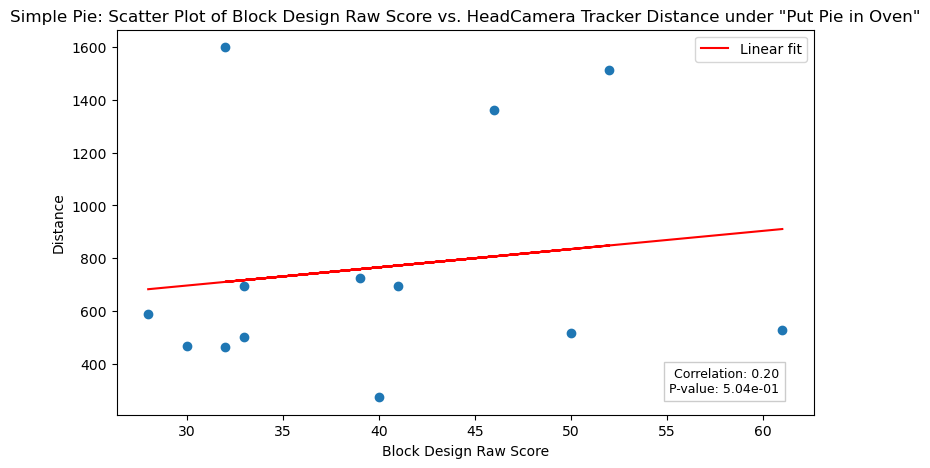

In [9]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['HeadCamera Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['HeadCamera Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['HeadCamera Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '65 SP_PieDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

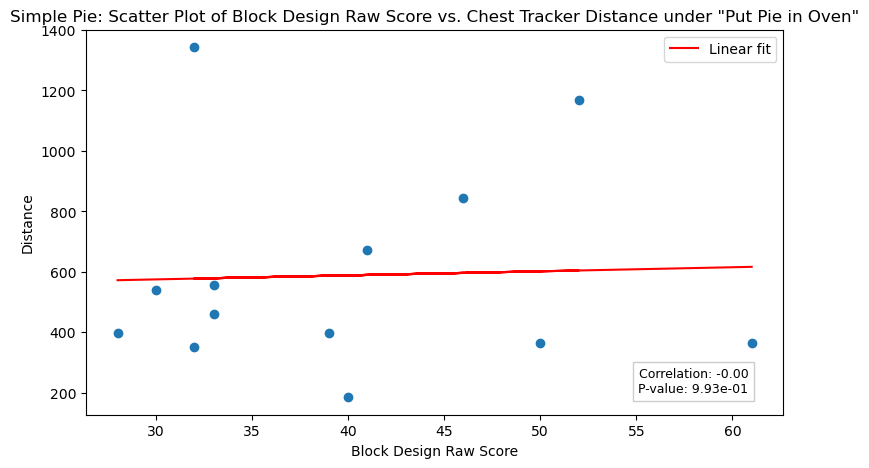

In [10]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['Chest Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['Chest Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['Chest Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '66 SP_PieDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

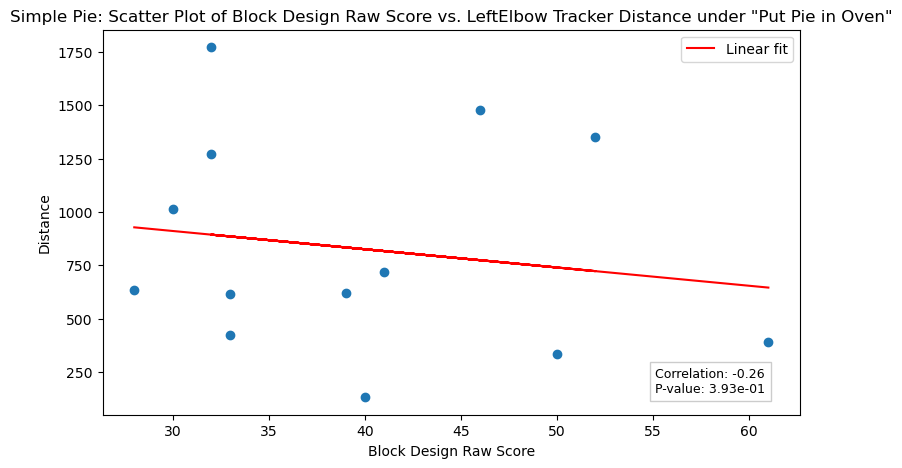

In [11]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftElbow Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftElbow Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftElbow Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '67 SP_PieDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

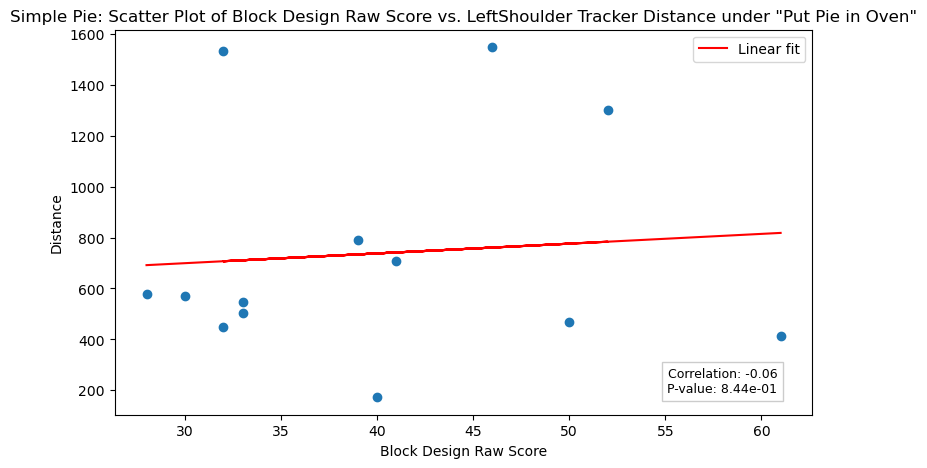

In [12]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftShoulder Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftShoulder Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftShoulder Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '68 SP_PieDistanceLeftShldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

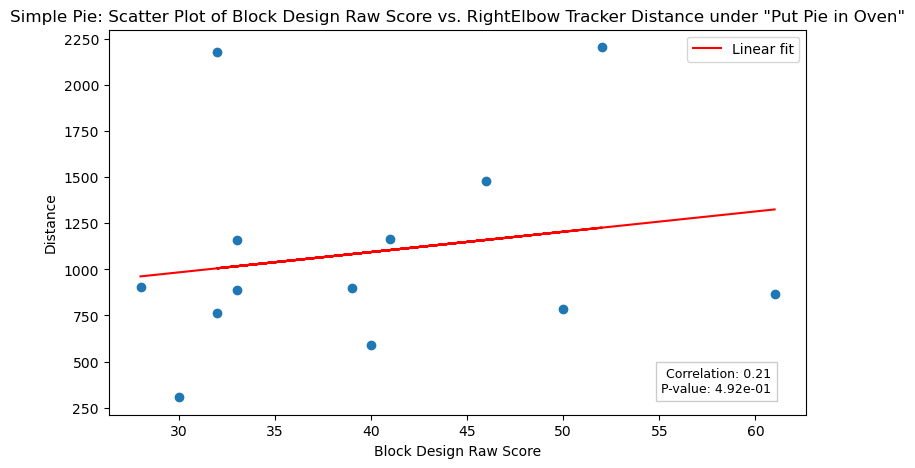

In [13]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightElbow Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightElbow Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightElbow Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '69 SP_PieDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

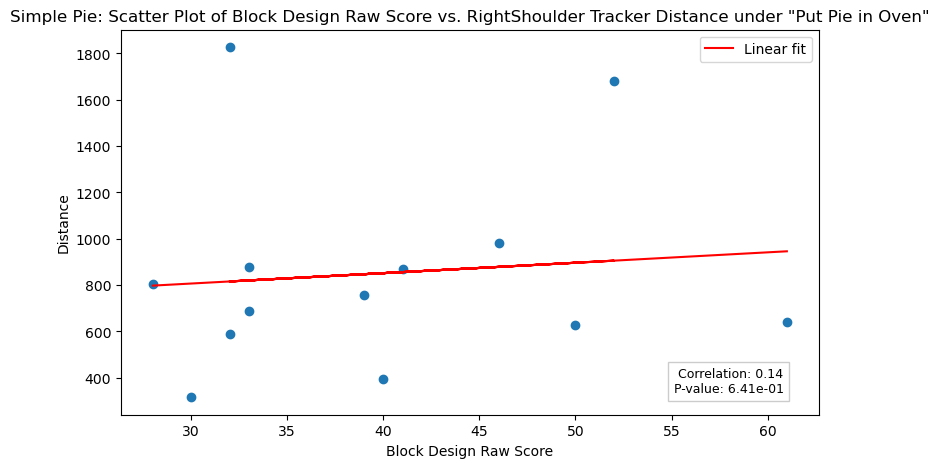

In [14]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightShoulder Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightShoulder Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightShoulder Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '70 SP_PieDistanceRightShouldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

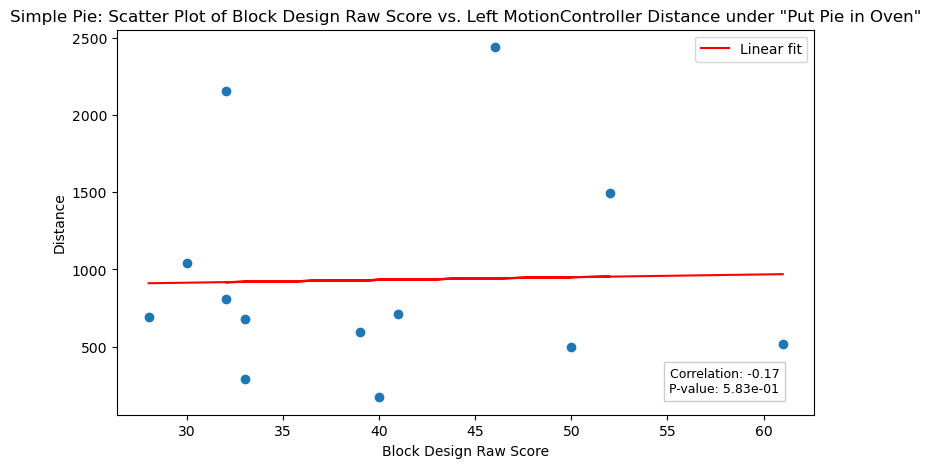

In [15]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerLeft Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerLeft Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerLeft Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '71 SP_PieDistanceLeftControllr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

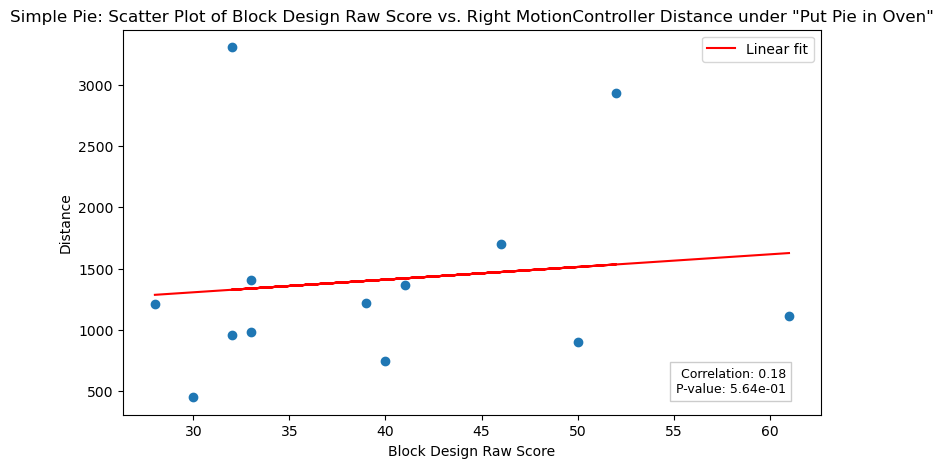

In [16]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerRight Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerRight Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerRight Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '72 SP_PieDistanceRightControllr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()